In [101]:
# Download of Data and Execution of Prophet happens in the same local computer

In [102]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from datetime import datetime
import MetaTrader5 as mt5
import numpy as np
import more_itertools as mit
import time
import os

In [103]:
# NUMBER OF COLUMNS TO BE DISPLAYED
pd.set_option('display.max_columns', 500)

# MAXIMUM TABLE WIDTH TO DISPLAY
pd.set_option('display.width', 1500)      
 
# ESTABLISH CONNECTION TO MT5 TERMINAL
if not mt5.initialize():
    print("initialize() FAILED, ERROR CODE =",mt5.last_error())
    quit() 

12:10:50 - cmdstanpy - INFO - Chain [1] start processing
12:10:51 - cmdstanpy - INFO - Chain [1] done processing


##################################
EURUSD.r
##################################


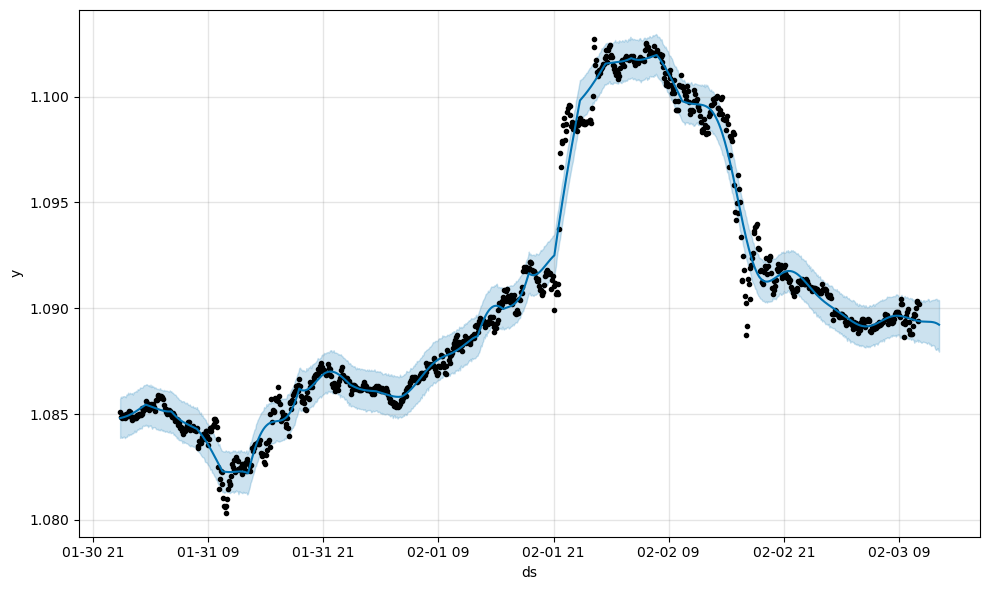

12:10:51 - cmdstanpy - INFO - Chain [1] start processing
12:10:52 - cmdstanpy - INFO - Chain [1] done processing


##################################
GBPUSD.r
##################################


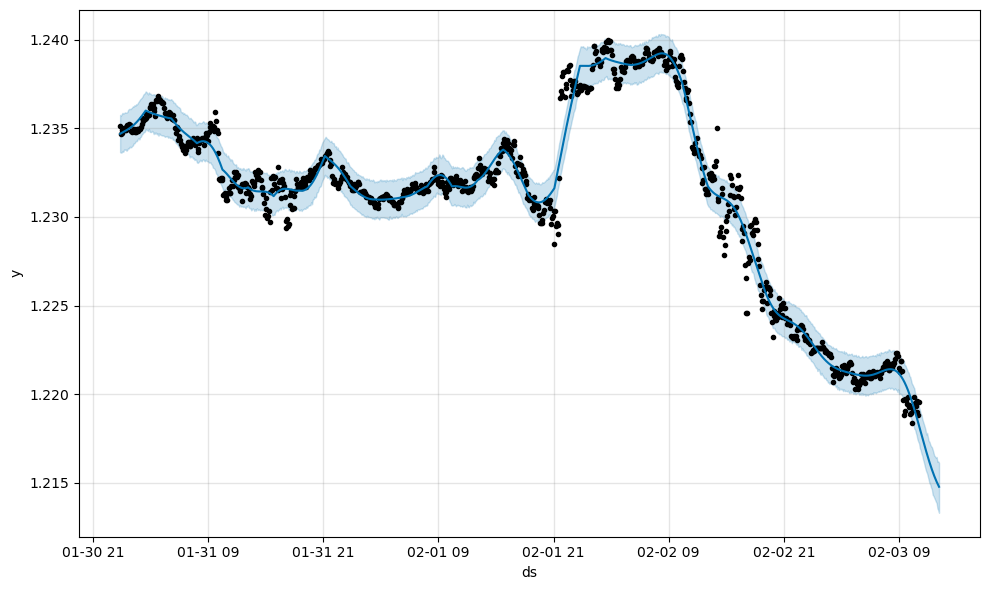

12:10:52 - cmdstanpy - INFO - Chain [1] start processing
12:10:53 - cmdstanpy - INFO - Chain [1] done processing


##################################
AUDUSD.r
##################################


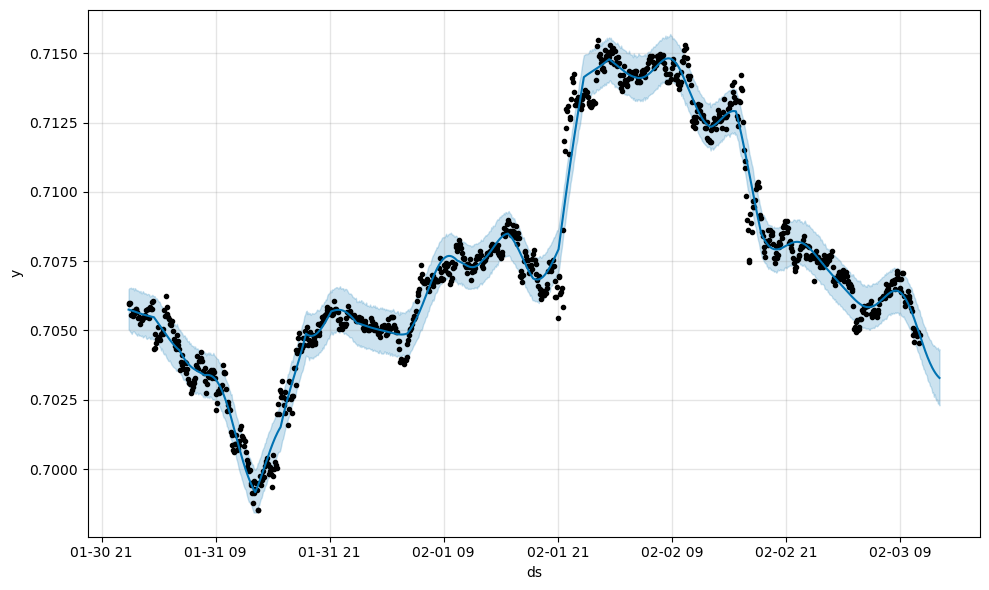

12:10:53 - cmdstanpy - INFO - Chain [1] start processing
12:10:54 - cmdstanpy - INFO - Chain [1] done processing


##################################
NZDUSD.r
##################################


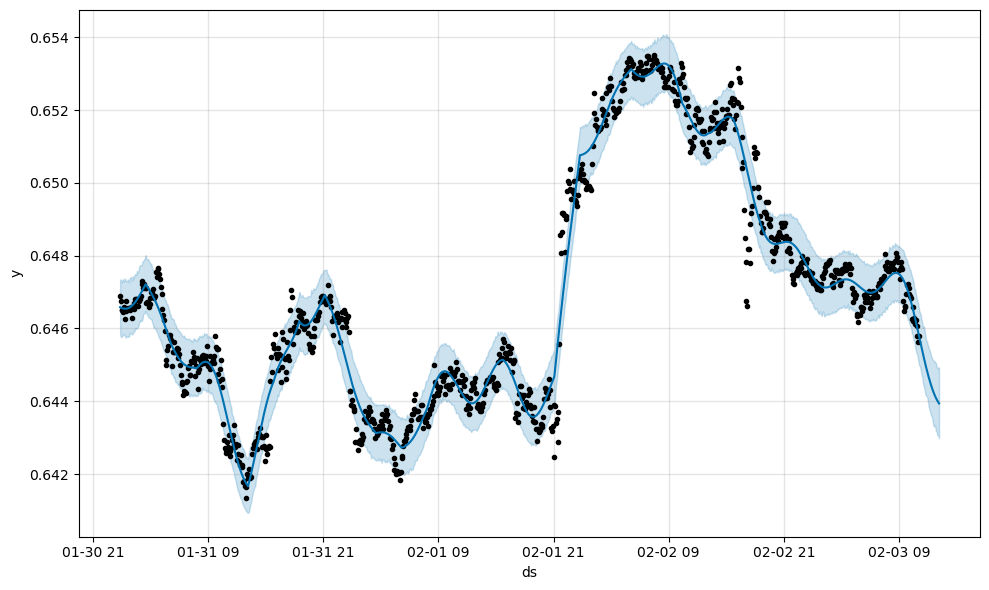

12:10:54 - cmdstanpy - INFO - Chain [1] start processing
12:10:55 - cmdstanpy - INFO - Chain [1] done processing


##################################
USDJPY.r
##################################


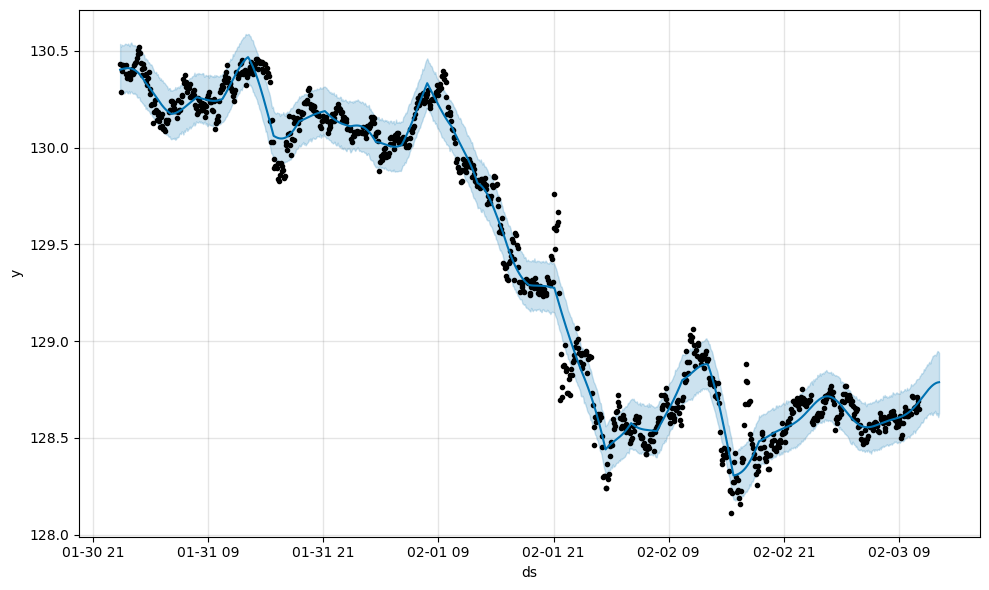

12:10:55 - cmdstanpy - INFO - Chain [1] start processing
12:10:56 - cmdstanpy - INFO - Chain [1] done processing


##################################
USDCHF.r
##################################


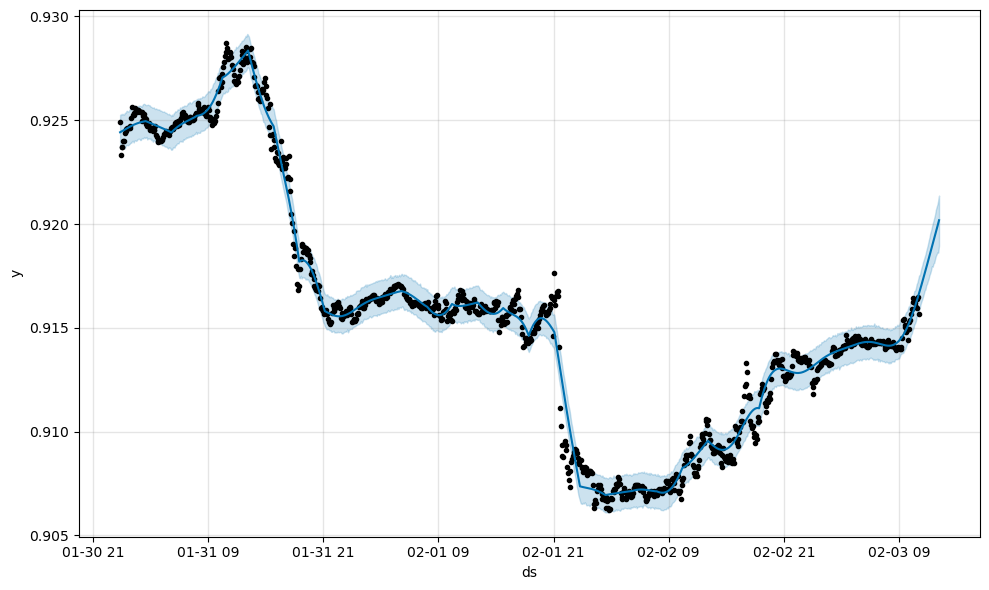

12:10:56 - cmdstanpy - INFO - Chain [1] start processing
12:10:57 - cmdstanpy - INFO - Chain [1] done processing


##################################
USDCAD.r
##################################


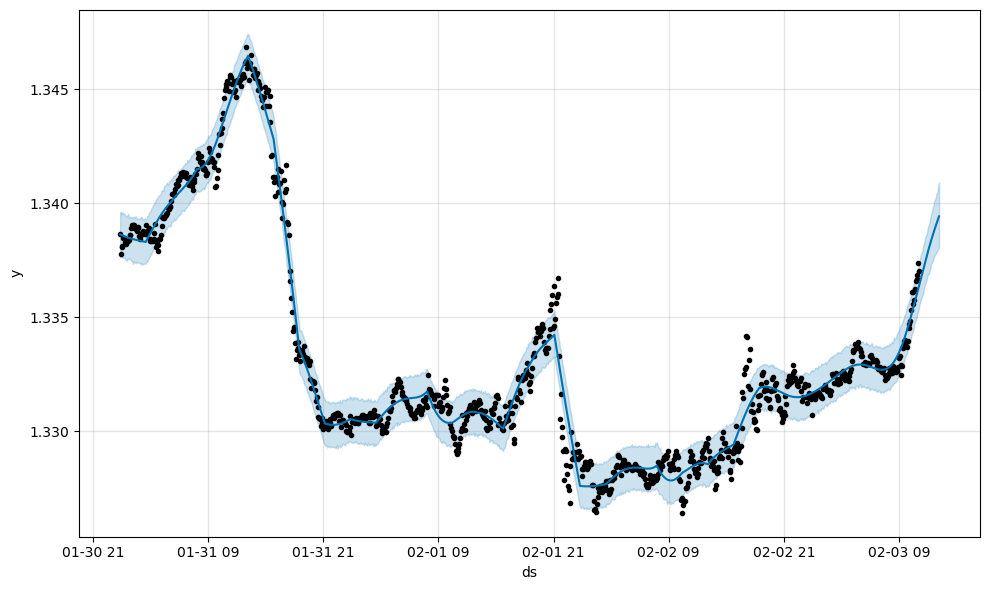

12:10:57 - cmdstanpy - INFO - Chain [1] start processing
12:10:58 - cmdstanpy - INFO - Chain [1] done processing


##################################
XAUUSD.r
##################################


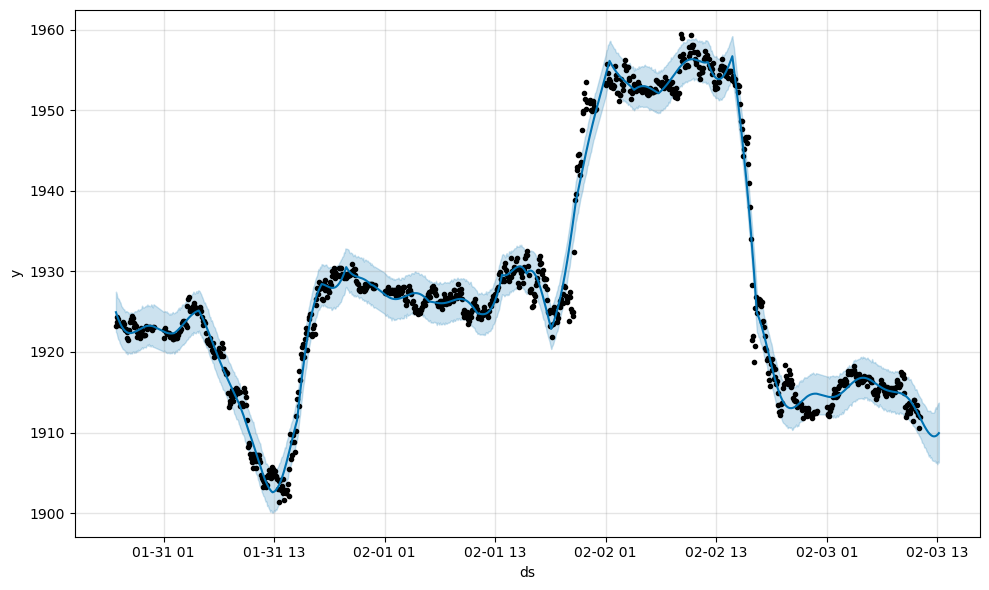

12:10:59 - cmdstanpy - INFO - Chain [1] start processing
12:10:59 - cmdstanpy - INFO - Chain [1] done processing


##################################
WTI
##################################


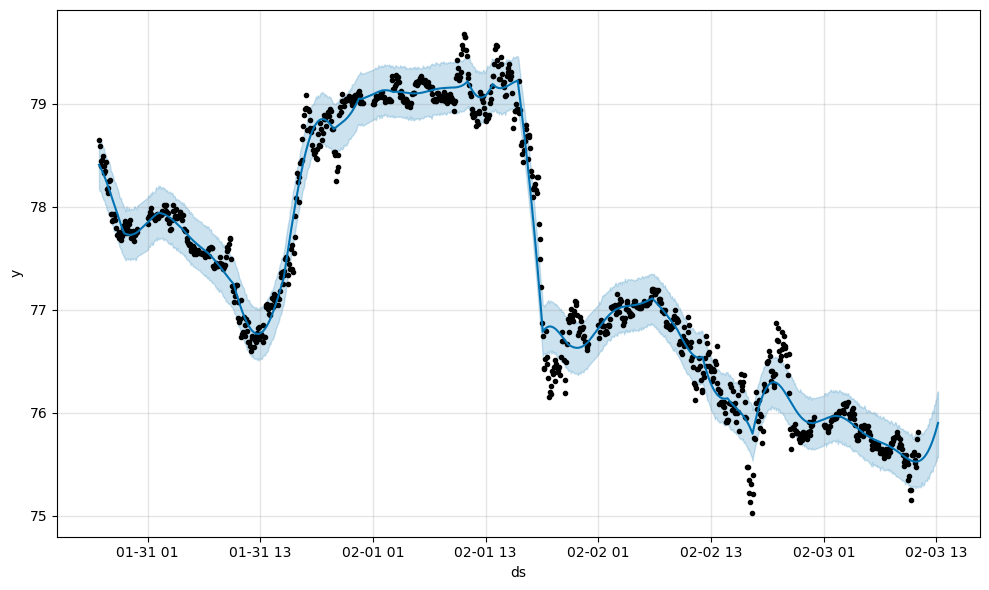

In [104]:
numCandles  = 1000
currency_pairs = None
with open('instruments.txt') as f:
    currency_pairs = [line.rstrip('\n') for line in f]

for i in currency_pairs:
    currency_pair = i
    rates_frame =  mt5.copy_rates_from_pos(currency_pair, mt5.TIMEFRAME_M5, 1, numCandles)
    rates_frame = pd.DataFrame(rates_frame)
    rates_frame['time']=pd.to_datetime(rates_frame['time'], unit='s')

    # prepare data for prophet
    p = int(0.025*len(rates_frame))


    df = pd.DataFrame()
    df["ds"]     = rates_frame["time"]
    df["y"]      = rates_frame["close"]



    # fit prophet model
    model = Prophet()

    model.fit(df)

    # predict future p closing prices
    future = model.make_future_dataframe(periods=p, freq='5min')

    forecast = model.predict(future)


    # plot predicted vs actual values
    print("##################################")
    print(currency_pair)
    print("##################################")
    model.plot(forecast)
    plt.show()